In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import hiive.mdptoolbox 
import hiive.mdptoolbox.mdp
import hiive.mdptoolbox.example
import gym
import matplotlib.pyplot as plt
import time

In [2]:
P, R = hiive.mdptoolbox.example.openai("FrozenLake-v1")

## Utilities

In [3]:
#https://www.kaggle.com/benjaminschreiber/markov-decision-processes
def plot_simple_data(x_var, y_var, x_label, y_label, title, figure_size=(4,3)):
    plt.rcParams["figure.figsize"] = figure_size
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(x_var, y_var, 'o-')
    plt.show()

def plot_data_legend(x_vars, x_label, all_y_vars, y_var_labels, y_label, title, y_bounds=None):
    colors = ['red','orange','black','green','blue','violet']
    plt.rcParams["figure.figsize"] = (4,3)

    i = 0
    for y_var in all_y_vars:
#         if i == 2: # don't plot when i = 1 for cv
#             x_vars = x_vars[1:]
        plt.plot(x_vars, y_var, 'o-', color=colors[i % 6], label=y_var_labels[i])
        i += 1
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if y_bounds != None:
        plt.ylim(y_bounds)
    leg = plt.legend()
    plt.show()

In [4]:
def make_time_array(run_stats, variables):
    cumulative_sum = 0
    times = []
    output_dict = {v:[] for v in variables}
    output_dict["times"] = times
    for result in run_stats:
        times.append(result["Time"])
        for v in result:
            if v in variables:
                output_dict[v].append(result[v])
    return output_dict

## Policy Iteration

### Find a suitable gamma for this problem

[0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99]


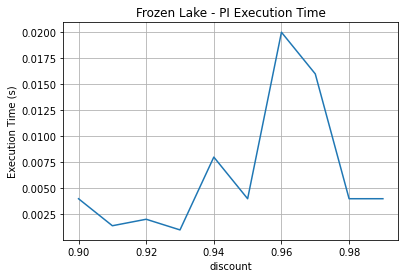

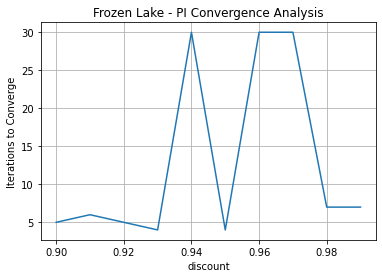

In [7]:
time_array=[0]*10
gamma_arr=[0]*10
iters=[0]*10

for i in range(0,10):
    st=time.time()
    PI = hiive.mdptoolbox.mdp.PolicyIteration(P, R, i/100+0.9, max_iter = 30)
    PI.run()
    end=time.time()
    gamma_arr[i]=(i/100+0.9)
    iters[i]=(PI.iter) 
    time_array[i]=(end-st)

print(gamma_arr)
plt.plot(gamma_arr, time_array)
plt.xlabel('discount')
plt.title('Frozen Lake - PI Execution Time')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

plt.plot(gamma_arr,iters)
plt.xlabel('discount')
plt.ylabel('Iterations to Converge')
plt.title('Frozen Lake - PI Convergence Analysis')
plt.grid()
plt.show()

### gamma/discount = 0.99，the change of value and time with episode/iteration

In [8]:
st = time.time()
PI = hiive.mdptoolbox.mdp.PolicyIteration(P, R, 0.99)
PI.run()
end = time.time()
end-st
PI.policy

(0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [9]:
PI.iter

7

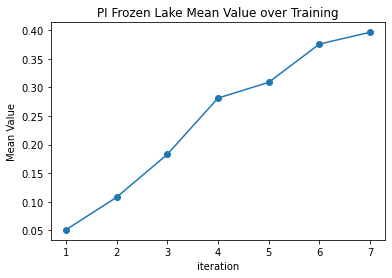

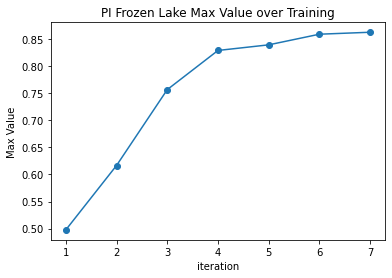

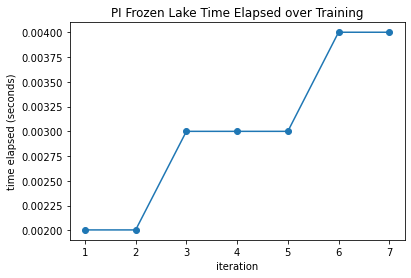

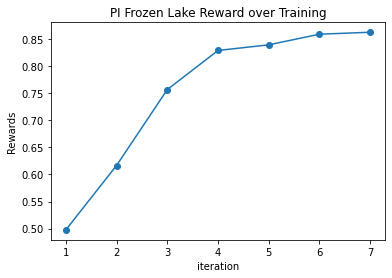

In [13]:
PI_results = make_time_array(PI.run_stats, ["Mean V", "Max V", "Iteration","Reward"])
num_iters = len(PI_results["Mean V"])
plot_simple_data(PI_results["Iteration"], PI_results["Mean V"], 
                 "iteration", "Mean Value", "PI Frozen Lake Mean Value over Training", figure_size=(6,4))
plot_simple_data(PI_results["Iteration"], PI_results["Max V"], 
                 "iteration", "Max Value", "PI Frozen Lake Max Value over Training", figure_size=(6,4))
plot_simple_data(PI_results["Iteration"], PI_results["times"], 
                 "iteration", "time elapsed (seconds)", "PI Frozen Lake Time Elapsed over Training", figure_size=(6,4))
plot_simple_data(PI_results["Iteration"], PI_results["Reward"], 
                 "iteration", "Rewards", "PI Frozen Lake Reward over Training", figure_size=(6,4))

## Value Iteration

[0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99]


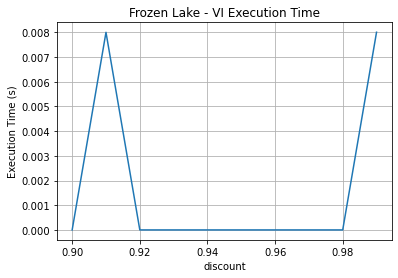

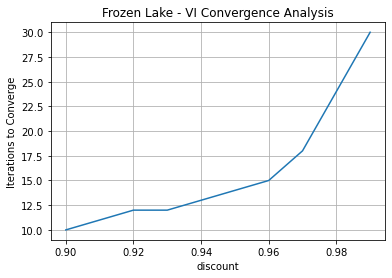

In [16]:
time_array=[0]*10
gamma_arr=[0]*10
iters=[0]*10

for i in range(0,10):
    st=time.time()
    PI = hiive.mdptoolbox.mdp.ValueIteration(P, R, i/100+0.9)
    PI.run()
    end=time.time()
    gamma_arr[i]=(i/100+0.9)
    iters[i]=(PI.iter) 
    time_array[i]=(end-st)

print(gamma_arr)
plt.plot(gamma_arr, time_array)
plt.xlabel('discount')
plt.title('Frozen Lake - VI Execution Time')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

plt.plot(gamma_arr,iters)
plt.xlabel('discount')
plt.ylabel('Iterations to Converge')
plt.title('Frozen Lake - VI Convergence Analysis')
plt.grid()
plt.show()

In [17]:
st = time.time()
VI = hiive.mdptoolbox.mdp.ValueIteration(P, R, 0.999)
VI.run()
end = time.time()
end-st
VI.policy

(0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [25]:
VI.iter

39

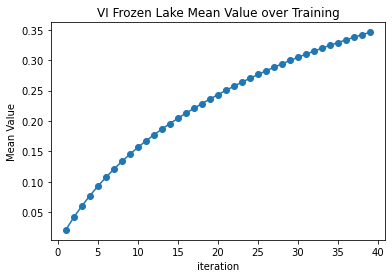

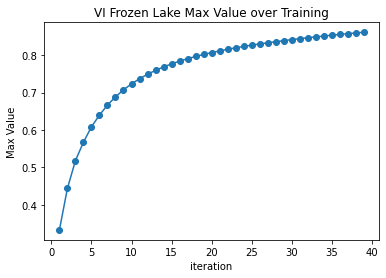

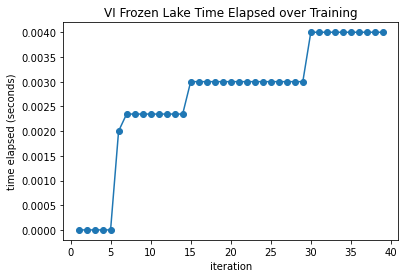

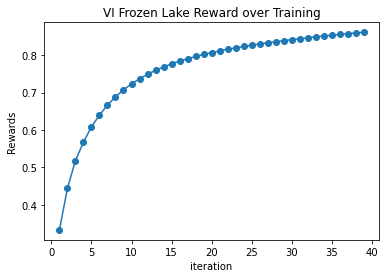

In [20]:
VI_results = make_time_array(VI.run_stats, ["Mean V", "Max V", "Iteration","Reward"])
num_iters = len(VI_results["Mean V"])
plot_simple_data(VI_results["Iteration"], VI_results["Mean V"], 
                 "iteration", "Mean Value", "VI Frozen Lake Mean Value over Training", figure_size=(6,4))
plot_simple_data(VI_results["Iteration"], VI_results["Max V"], 
                 "iteration", "Max Value", "VI Frozen Lake Max Value over Training", figure_size=(6,4))
plot_simple_data(VI_results["Iteration"], VI_results["times"], 
                 "iteration", "time elapsed (seconds)", "VI Frozen Lake Time Elapsed over Training", figure_size=(6,4))
plot_simple_data(VI_results["Iteration"], VI_results["Reward"], 
                 "iteration", "Rewards", "VI Frozen Lake Reward over Training", figure_size=(6,4))

## Q learning

In [31]:
Qlearning = hiive.mdptoolbox.mdp.QLearning(P, R, 0.999, epsilon=0 ,epsilon_decay=0.5, n_iter=1000000, alpha=0.95, skip_check=True)
Qlearning.run()

[{'State': 3,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0039997100830078125,
  'Alpha': 0.35124315576724024,
  'Epsilon': 0.1,
  'Gamma': 0.999,
  'V[0]': 0.0,
  'Max V': 0.0,
  'Mean V': 0.0,
  'Iteration': 100},
 {'State': 13,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.00700068473815918,
  'Alpha': 0.12856635466168048,
  'Epsilon': 0.1,
  'Gamma': 0.999,
  'V[0]': 0.0,
  'Max V': 0.0,
  'Mean V': 0.0,
  'Iteration': 200},
 {'State': 8,
  'Action': 3,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.010001420974731445,
  'Alpha': 0.047059443805779214,
  'Epsilon': 0.1,
  'Gamma': 0.999,
  'V[0]': 0.0,
  'Max V': 0.0,
  'Mean V': 0.0,
  'Iteration': 300},
 {'State': 2,
  'Action': 3,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.015008926391601562,
  'Alpha': 0.017225278395245323,
  'Epsilon': 0.1,
  'Gamma': 0.999,
  'V[0]': 0.0,
  'Max V': 0.0,
  'Mean V': 0.0,
  'Iteration': 400},
 {'State': 2,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0

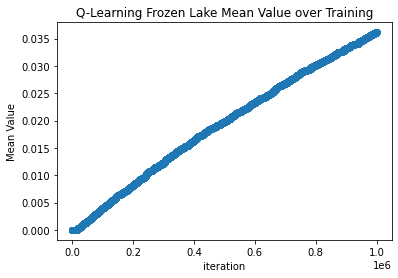

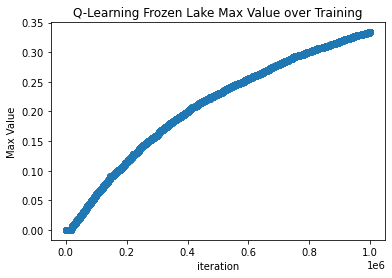

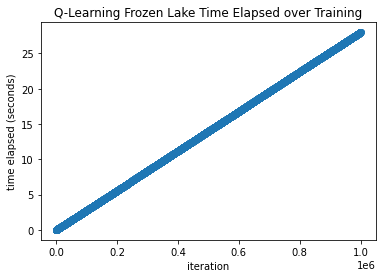

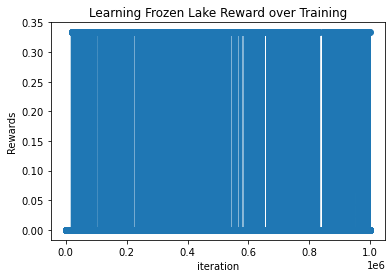

In [32]:
Q_results = make_time_array(Qlearning.run_stats, ["Mean V", "Max V", "Iteration","Reward"])
num_iters = len(Q_results["Mean V"])
plot_simple_data(Q_results["Iteration"], Q_results["Mean V"], 
                 "iteration", "Mean Value", "Q-Learning Frozen Lake Mean Value over Training", figure_size=(6,4))
plot_simple_data(Q_results["Iteration"], Q_results["Max V"], 
                 "iteration", "Max Value", "Q-Learning Frozen Lake Max Value over Training", figure_size=(6,4))
plot_simple_data(Q_results["Iteration"], Q_results["times"], 
                 "iteration", "time elapsed (seconds)", "Q-Learning Frozen Lake Time Elapsed over Training", figure_size=(6,4))
plot_simple_data(Q_results["Iteration"], Q_results["Reward"], 
                 "iteration", "Rewards", "Learning Frozen Lake Reward over Training", figure_size=(6,4))